<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 149.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 167.1 MB/s eta 0:00:00


In [3]:
!pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 105.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 90.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 101.1 MB/s eta 0:00:00


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [4]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-05-29 20:41:28--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  47.6MB/s    in 3.2s    

2025-05-29 20:41:32 (47.5 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [6]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [7]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



/tmp/ipykernel_302/4287362815.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_Age_grouped=df_JobSat_Age.groupby('Age').agg({'JobSatPoints_6': 'median', 'JobSatPoints_7': 'median'})


<Figure size 1400x1200 with 0 Axes>

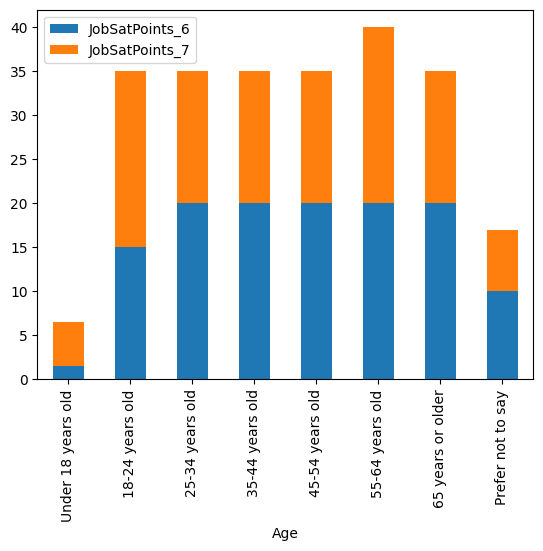

In [8]:
##Write your code here
df_JobSat_Age=df[['Age','JobSatPoints_6','JobSatPoints_7']].copy()
from pandas.api.types import CategoricalDtype
AgeLabels = ['Under 18 years old','18-24 years old', '25-34 years old','35-44 years old','45-54 years old',
             '55-64 years old','65 years or older','Prefer not to say']
Age_ordered = CategoricalDtype(categories = AgeLabels, ordered = True)
df_JobSat_Age['Age'] = df_JobSat_Age['Age'].astype(Age_ordered)
df_JobSat_Age=df_JobSat_Age.dropna(subset=['JobSatPoints_6','JobSatPoints_7'])
df_Age_grouped=df_JobSat_Age.groupby('Age').agg({'JobSatPoints_6': 'median', 'JobSatPoints_7': 'median'})
plt.figure(figsize=(14,12))
df_Age_grouped.plot.bar(stacked=True)
# Show the chart
plt.show()



##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


<Figure size 1400x1000 with 0 Axes>

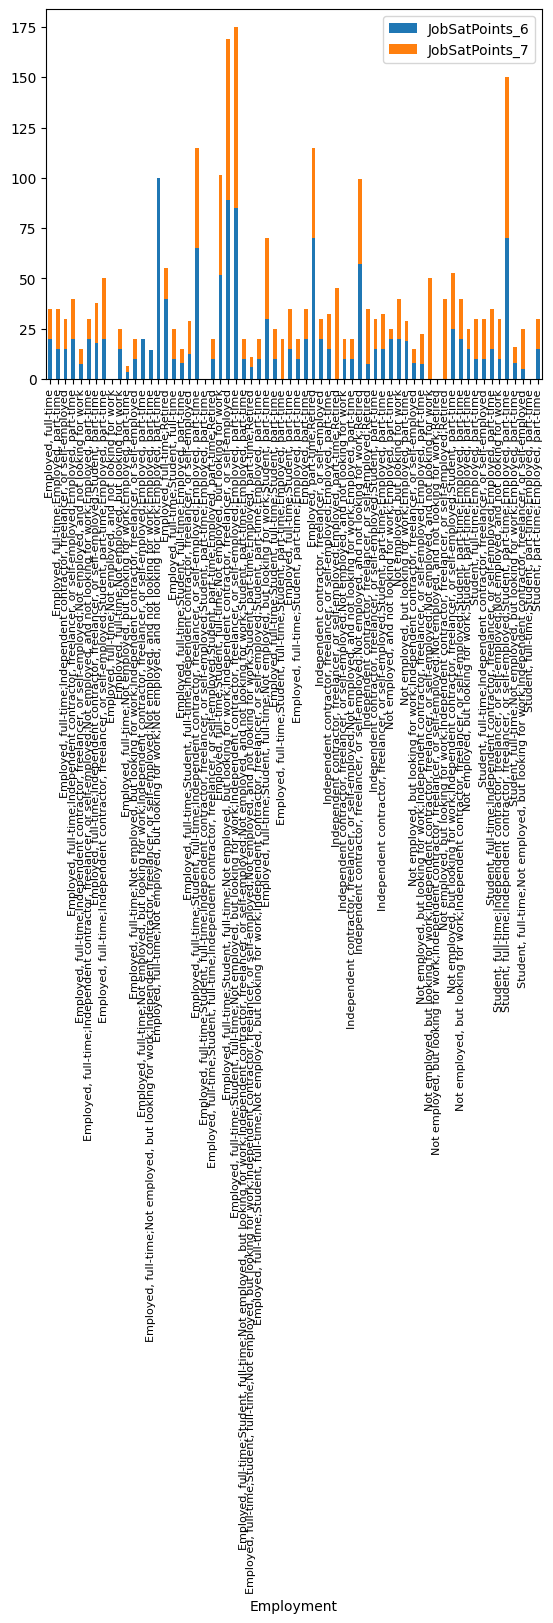

In [9]:
##Write your code here
df_JobSat_Employment=df[['Employment','JobSatPoints_6','JobSatPoints_7']].copy()
df_JobSat_Employment=df_JobSat_Employment.dropna(subset=['JobSatPoints_6','JobSatPoints_7'])
df_Employment_grouped=df_JobSat_Employment.groupby('Employment').agg({'JobSatPoints_6': 'median', 'JobSatPoints_7': 'median'})
plt.figure(figsize=(14,10))
df_Employment_grouped.plot.bar(stacked=True)
plt.tick_params(axis='x', labelsize=8)

### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


                 ConvertedCompYearly  JobSatPoints_6
Age                                                 
25-34 years old             0.004333             0.2


<Axes: xlabel='Age'>

<Figure size 800x600 with 0 Axes>

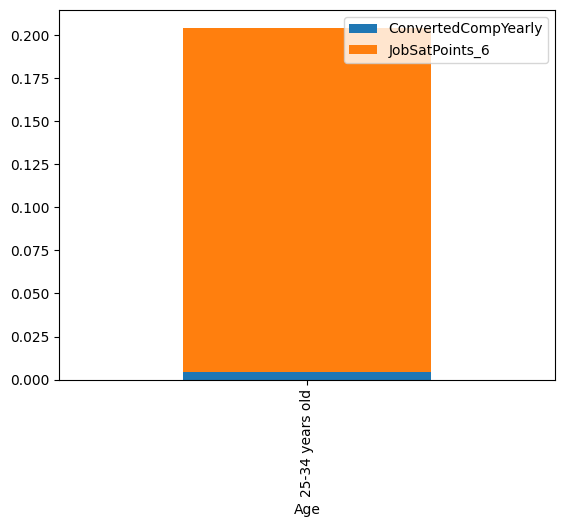

In [10]:
##Write your code here
df_JobSat_Comp_Age=df[['Age','JobSatPoints_6','ConvertedCompYearly']].copy()
df_JobSat_Comp_Age=df_JobSat_Comp_Age.dropna(subset=['ConvertedCompYearly','JobSatPoints_6'])
df_JobSat_Comp_Age=df_JobSat_Comp_Age[df_JobSat_Comp_Age['Age']=='25-34 years old']
df_JobSat_Comp_Age['JobSatPoints_6']= (df_JobSat_Comp_Age['JobSatPoints_6'] - df_JobSat_Comp_Age['JobSatPoints_6'].min()) / (df_JobSat_Comp_Age['JobSatPoints_6'].max() - df_JobSat_Comp_Age['JobSatPoints_6'].min())
df_JobSat_Comp_Age['ConvertedCompYearly']= (df_JobSat_Comp_Age['ConvertedCompYearly'] - df_JobSat_Comp_Age['ConvertedCompYearly'].min()) / (df_JobSat_Comp_Age['ConvertedCompYearly'].max() - df_JobSat_Comp_Age['ConvertedCompYearly'].min())
df_Comp_grouped_Age=df_JobSat_Comp_Age.groupby('Age').agg({'ConvertedCompYearly': 'median', 'JobSatPoints_6': 'median'})
print(df_Comp_grouped_Age)
plt.figure(figsize=(8,6))
df_Comp_grouped_Age.plot.bar(stacked=True)

##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


/tmp/ipykernel_302/3641885464.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_Comp_grouped=df_JobSat_Comp.groupby('Age').agg({'ConvertedCompYearly': 'median', 'JobSatPoints_6': 'median'})


<Axes: xlabel='Age'>

<Figure size 800x600 with 0 Axes>

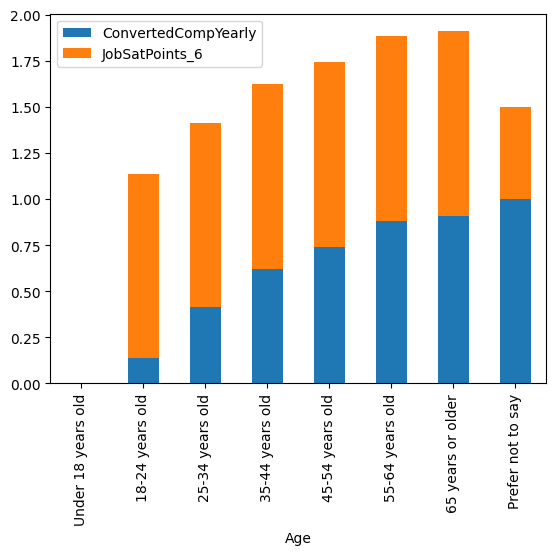

In [11]:
##Write your code here
df_JobSat_Comp=df[['Age','JobSatPoints_6','ConvertedCompYearly']].copy()
df_JobSat_Comp=df_JobSat_Comp.dropna(subset=['ConvertedCompYearly','JobSatPoints_6'])
df_JobSat_Comp['Age'] = df_JobSat_Age['Age'].astype(Age_ordered)
df_Comp_grouped=df_JobSat_Comp.groupby('Age').agg({'ConvertedCompYearly': 'median', 'JobSatPoints_6': 'median'})
df_Comp_grouped['JobSatPoints_6']= (df_Comp_grouped['JobSatPoints_6'] - df_Comp_grouped['JobSatPoints_6'].min()) / (df_Comp_grouped['JobSatPoints_6'].max() - df_Comp_grouped['JobSatPoints_6'].min())
df_Comp_grouped['ConvertedCompYearly']= (df_Comp_grouped['ConvertedCompYearly'] - df_Comp_grouped['ConvertedCompYearly'].min()) / (df_Comp_grouped['ConvertedCompYearly'].max() - df_Comp_grouped['ConvertedCompYearly'].min())
plt.figure(figsize=(8,6))
df_Comp_grouped.plot.bar(stacked=True)

### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


/tmp/ipykernel_302/1788480372.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_stacked = df_stacked.groupby('Age')['DatabaseWantToWorkWith'].value_counts().unstack(fill_value=0)


<Axes: xlabel='Age'>

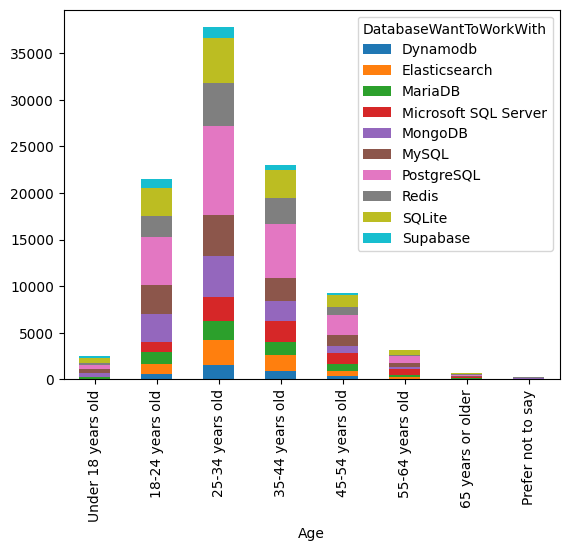

In [12]:
##Write your code here
#Create a copy of Age and DatabaseWantToWorkWith
df_Database_Age=df[['Age','DatabaseWantToWorkWith']].copy()
df_Database_Age=df_Database_Age.dropna(subset=['Age','DatabaseWantToWorkWith'])
#Arrange the age in order
df_Database_Age['Age'] = df_Database_Age['Age'].astype(Age_ordered)
#Split and Get the DatabaseWantToWorkWith into a single column
df_Database_Age['DatabaseWantToWorkWith']=df_Database_Age['DatabaseWantToWorkWith'].str.split(';')
df_exploded=df_Database_Age.explode('DatabaseWantToWorkWith')
df_exploded['DatabaseWantToWorkWith']=df_exploded['DatabaseWantToWorkWith'].str.strip()
#Calculate the Top10 DatabaseWantToWorkWith
Top_10_Databases=df_exploded['DatabaseWantToWorkWith'].value_counts().head(10).index.to_list()
#Create a copy of df containing only top 10 DatabaseWantToWorkWith
df_stacked=df_exploded[df_exploded['DatabaseWantToWorkWith'].isin(Top_10_Databases)].copy()
#Groupby Age and create a count of the top 10 DatabaseWantToWorkWith
df_stacked = df_stacked.groupby('Age')['DatabaseWantToWorkWith'].value_counts().unstack(fill_value=0)
df_stacked.plot.bar(stacked=True)

##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


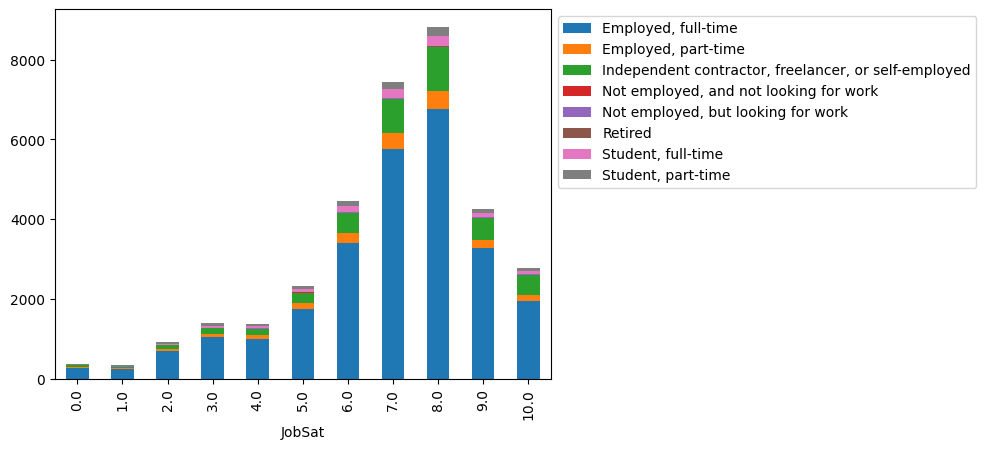

In [20]:
##Write your code here
#Create a copy of Employment and JobSat
df_Employment_JobSat=df[['JobSat','Employment']].copy()
df_Employment_JobSat=df_Employment_JobSat.dropna(subset=['JobSat','Employment'])
#Split and Get the 'Employment' into a single column
df_Employment_JobSat['Employment']=df_Employment_JobSat['Employment'].str.split(';')
df_exploded=df_Employment_JobSat.explode('Employment')
df_exploded['Employment']=df_exploded['Employment'].str.strip()
df_exploded['Employment'].value_counts()
#Groupby JobSatisfaction and create a count of Employment
df_stacked = df_exploded.groupby('JobSat')['Employment'].value_counts().unstack(fill_value=0)
df_stacked.plot.bar(stacked=True)
#Place the legend outside the chart
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


/tmp/ipykernel_302/3989373799.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_stacked = df_stacked.groupby('Age')['LanguageAdmired'].value_counts().unstack(fill_value=0)


<Axes: xlabel='Age'>

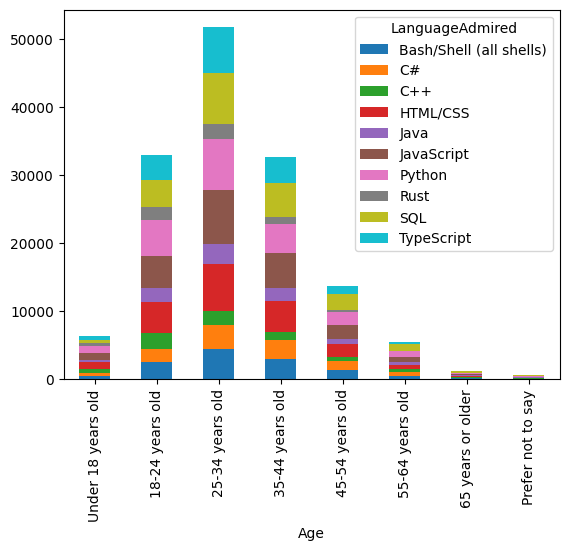

In [23]:
##Write your code here
#Create a copy of Age and LanguageAdmired
df_LanguageAdmired_Age=df[['Age','LanguageAdmired']].copy()
df_LanguageAdmired_Age=df_LanguageAdmired_Age.dropna(subset=['Age','LanguageAdmired'])
#Arrange the age in order
df_LanguageAdmired_Age['Age'] = df_LanguageAdmired_Age['Age'].astype(Age_ordered)
#Split and Get the LanguageAdmired into a single column
df_LanguageAdmired_Age['LanguageAdmired']=df_LanguageAdmired_Age['LanguageAdmired'].str.split(';')
df_exploded=df_LanguageAdmired_Age.explode('LanguageAdmired')
df_exploded['LanguageAdmired']=df_exploded['LanguageAdmired'].str.strip()
#Calculate the Top10 LanguageAdmired
Top_10_LanguageAdmired=df_exploded['LanguageAdmired'].value_counts().head(10).index.to_list()
#Create a copy of df containing only top 10 LanguageAdmired
df_stacked=df_exploded[df_exploded['LanguageAdmired'].isin(Top_10_LanguageAdmired)].copy()
#Groupby Age and create a count of the top 10 LanguageAdmired
df_stacked = df_stacked.groupby('Age')['LanguageAdmired'].value_counts().unstack(fill_value=0)
df_stacked.plot.bar(stacked=True)


##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


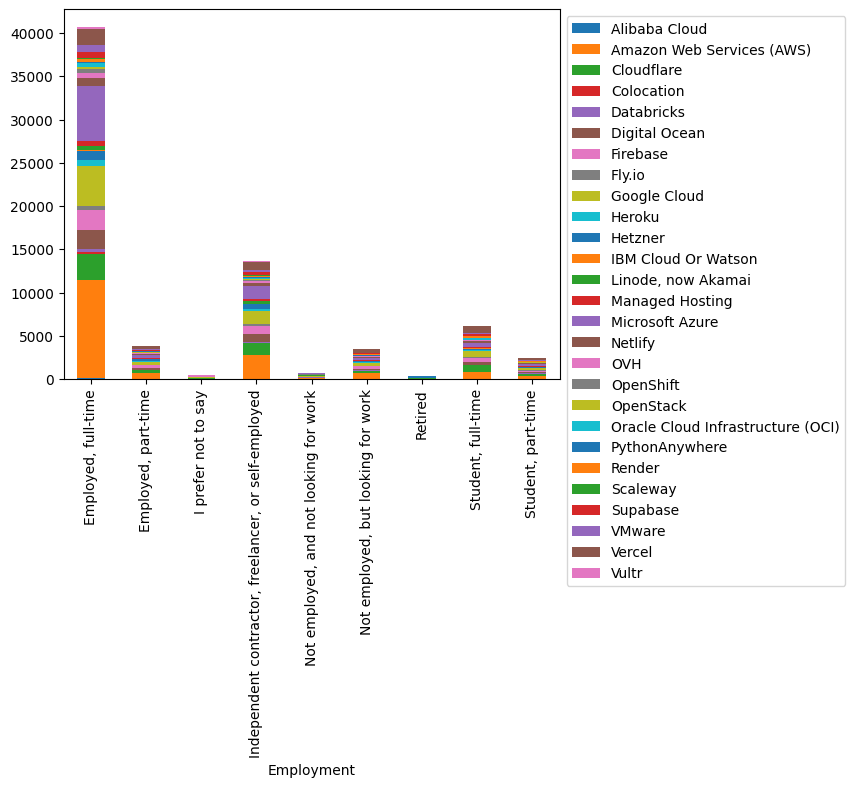

In [25]:
##Write your code here
#Create a copy of PlatformAdmired and Employment
df_PlatformAdmired=df[['Employment','PlatformAdmired']].copy()
df_PlatformAdmired=df_PlatformAdmired.dropna(subset=['Employment','PlatformAdmired'])
#Split and Get the PlatformAdmired into a single column
df_PlatformAdmired['PlatformAdmired']=df_PlatformAdmired['PlatformAdmired'].str.split(';')
df_Platform=df_PlatformAdmired.explode('PlatformAdmired')
df_Platform['PlatformAdmired']=df_Platform['PlatformAdmired'].str.strip()
#Split and Get the Employment in single column
df_Platform['Employment']=df_Platform['Employment'].str.split(';')
df_exploded=df_Platform.explode('Employment')
df_exploded['Employment']=df_exploded['Employment'].str.strip()
#Calculate the Top10 LanguageAdmired
#Top_10_LanguageAdmired=df_exploded['LanguageAdmired'].value_counts().head(10).index.to_list()
#Create a copy of df containing only top 10 LanguageAdmired
#df_stacked=df_exploded[df_exploded['LanguageAdmired'].isin(Top_10_LanguageAdmired)].copy()
#Groupby Age and create a count of the top 10 LanguageAdmired
df_stacked = df_exploded.groupby('Employment')['PlatformAdmired'].value_counts().unstack(fill_value=0)
df_stacked.plot.bar(stacked=True)
#Place the legend outside the chart
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
